In [21]:
import pandas as pd 
from sklearn.model_selection import train_test_split

In [22]:
df=pd.read_csv('potato.csv')
df.head()

,Date,Centre_Name,Commodity_Name,Price
0,25-11-1997,AGARTALA,Potato,4.5
1,26-11-1997,AGARTALA,Potato,4.5
2,27-11-1997,AGARTALA,Potato,4.5
3,28-11-1997,AGARTALA,Potato,4.5
4,01-12-1997,AGARTALA,Potato,4.5


In [23]:
# df=df[df['Centre_Name']=='BENGALURU']

In [41]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)
df['date_numeric'] = df['Date'].apply(lambda x: x.timestamp())
X=df[['date_numeric','Centre_Name']]
y=df['Price']

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [43]:
X_train.shape

(75149, 2)

In [44]:
X_test.shape

(32208, 2)

In [45]:
import category_encoders as ce 

encoder=ce.TargetEncoder(cols=['Centre_Name'])

X_train['Centre_Name']=encoder.fit_transform(X_train['Centre_Name'],y_train)

X_test['Centre_Name']=encoder.transform(X_test['Centre_Name'])

In [46]:
from sklearn.linear_model import LinearRegression

model=LinearRegression().fit(X_train,y_train)
print(model)

LinearRegression()


In [47]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [20. 14. 10.  8. 10. 21. 11. 10. 14.  6.]
Actual labels   :  88770      9.0
31374     10.0
9255      10.0
35342      5.0
86676      7.0
103975    20.0
56017      4.0
81002     14.0
96509     16.0
90798      5.0
Name: Price, dtype: float64


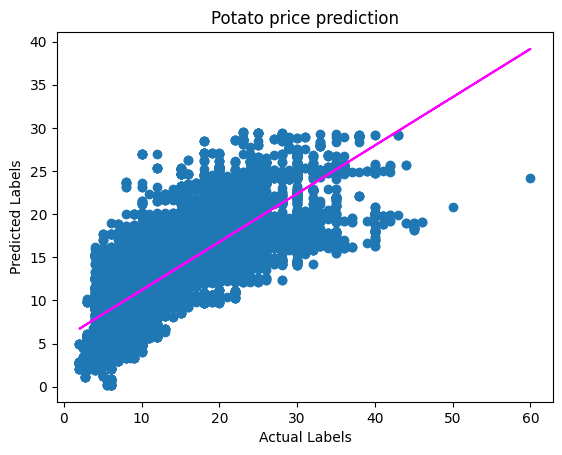

In [48]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Potato price prediction')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 21.162574214187064
RMSE: 4.600279797380488
R2: 0.5531954086428952


In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

model=DecisionTreeRegressor()
model.fit(X_train,y_train)
print(model,'\n')

tree=export_text(model)


DecisionTreeRegressor() 



MSE: 0.7631103297317436
RMSE: 0.8735618637118631
R2: 0.9838884818271493


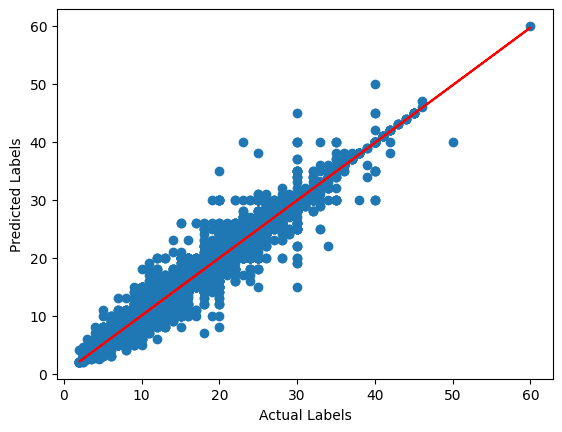

In [51]:
predictions=model.predict(X_test)
mse=mean_squared_error(y_test,predictions)
print("MSE:",mse)
rmse=np.sqrt(mse)
print("RMSE:",rmse)
r2=r2_score(y_test,predictions)
print("R2:",r2)

plt.scatter(y_test,predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z=np.polyfit(y_test,predictions,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='red')
plt.show()

In [61]:
today=pd.DataFrame({"date_numeric":[pd.to_datetime("19-03-2025",dayfirst=True).timestamp()],"Centre_Name":["DELHI"]})
today['Centre_Name']=encoder.transform(today['Centre_Name'])

In [62]:
model.predict(today)

array([12.])